In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [117]:
bank=pd.read_excel(r"C:\Users\hp\Downloads\bank.xlsx")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Univariate Analysis

In [8]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:'count'},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'percentage'},inplace=True)
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%'
    ff=pd.concat([f1,f2],axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f'Value count and %\n:',ff)
    sns.countplot(data=data, x=x)
    plt.show

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Value count and %
:                count percentage
management      2566     22.99%
blue-collar     1944     17.42%
technician      1823     16.33%
admin.          1334     11.95%
services         923      8.27%
retired          778      6.97%
self-employed    405      3.63%
student          360      3.23%
unemployed       357       3.2%
entrepreneur     328      2.94%
housemaid        274      2.45%
unknown           70      0.63%


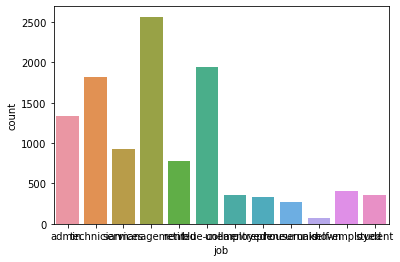

In [9]:
univariate_cat(data=bank, x="job")

In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
bank["job"]=bank["job"].replace(["management", "admin."], "White-coller")
bank["job"]=bank["job"].replace(["services", "housemaid"], "pink-coller")
bank["job"]=bank["job"].replace(["retired", "student", "unemployed", "unknown"], "Others")
bank["job"]=bank["job"].replace(["self-employed", "entrepreneur", ], "self-depend")

Total missing values : 0

Total count of unique categories: 6

Unique categories :
['White-coller', 'technician', 'pink-coller', 'Others', 'blue-collar', 'self-depend']
Value count and %
:               count percentage
White-coller   3900     34.94%
blue-collar    1944     17.42%
technician     1823     16.33%
Others         1565     14.02%
pink-coller    1197     10.72%
self-depend     733      6.57%


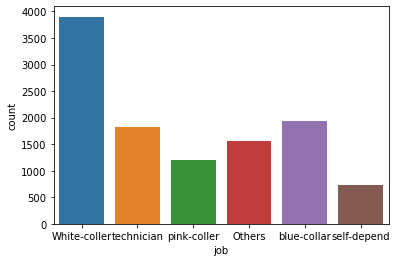

In [12]:
univariate_cat(data=bank, x="job")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['married', 'single', 'divorced']
Value count and %
:           count percentage
married    6351      56.9%
single     3518     31.52%
divorced   1293     11.58%


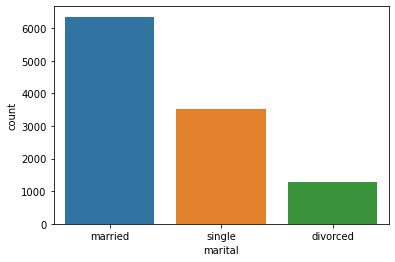

In [13]:
univariate_cat(data=bank, x="marital")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['secondary', 'tertiary', 'primary', 'unknown']
Value count and %
:            count percentage
secondary   5476     49.06%
tertiary    3689     33.05%
primary     1500     13.44%
unknown      497      4.45%


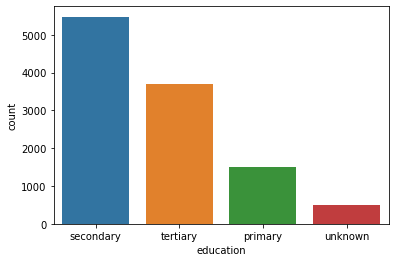

In [14]:
univariate_cat(data=bank, x="education")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
:      count percentage
no   10994     98.49%
yes    168      1.51%


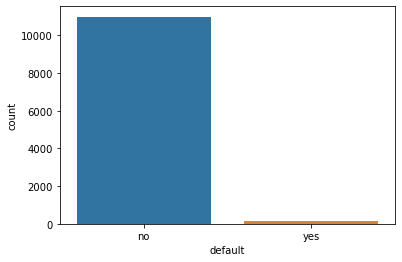

In [15]:
univariate_cat(data=bank, x="default")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
:      count percentage
no    5881     52.69%
yes   5281     47.31%


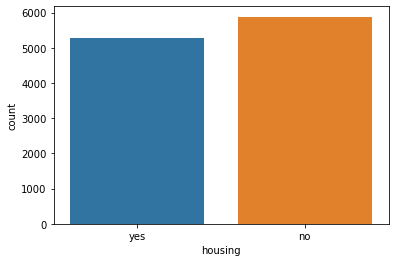

In [16]:
univariate_cat(data=bank, x="housing")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
:      count percentage
no    9702     86.92%
yes   1460     13.08%


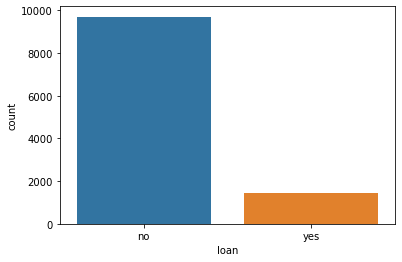

In [17]:
univariate_cat(data=bank, x="loan")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['unknown', 'cellular', 'telephone']
Value count and %
:            count percentage
cellular    8042     72.05%
unknown     2346     21.02%
telephone    774      6.93%


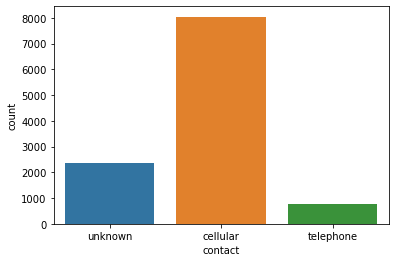

In [18]:
univariate_cat(data=bank, x="contact")

In [19]:
bank[bank["contact"]=="unknown"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White-coller,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,White-coller,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,pink-coller,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,White-coller,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,55,pink-coller,divorced,secondary,no,2166,yes,no,unknown,28,may,23,17,-1,0,unknown,no
11144,60,Others,married,secondary,no,0,yes,no,unknown,15,may,229,1,-1,0,unknown,no
11148,32,blue-collar,married,secondary,no,1,yes,no,unknown,8,may,102,1,-1,0,unknown,no
11151,40,White-coller,married,tertiary,no,917,yes,no,unknown,20,may,292,1,-1,0,unknown,no


In [20]:
bank.drop(columns=["contact"], inplace=True)

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
Value count and %
:      count percentage
may   2824      25.3%
aug   1519     13.61%
jul   1514     13.56%
jun   1222     10.95%
nov    943      8.45%
apr    923      8.27%
feb    776      6.95%
oct    392      3.51%
jan    344      3.08%
sep    319      2.86%
mar    276      2.47%
dec    110      0.99%


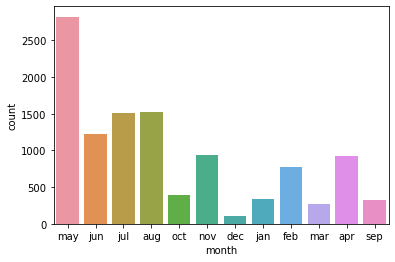

In [21]:
univariate_cat(data=bank, x="month")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
Value count and %
:          count percentage
unknown   8326     74.59%
failure   1228      11.0%
success   1071       9.6%
other      537      4.81%


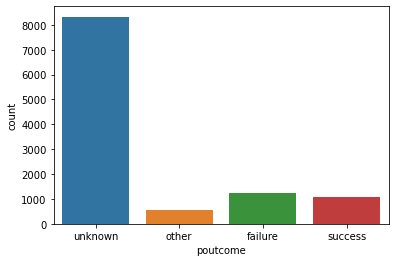

In [22]:
univariate_cat(data=bank, x="poutcome")

In [23]:
bank["poutcome"]=bank["poutcome"].replace(["other", "unknown"], "others")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
:      count percentage
no    5873     52.62%
yes   5289     47.38%


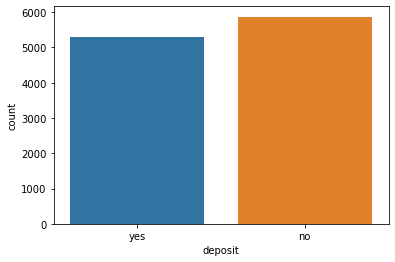

In [24]:
univariate_cat(data=bank, x="deposit")

In [25]:
bank["deposit"]=bank["deposit"].map({"yes" : 1 , "no": 0})

In [26]:
bank["deposit"].dtype

dtype('int64')

In [27]:
def univariate_num(data, x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min() , 2)
    max1=round(data[x].max() , 2)
    mean=round(data[x].mean() , 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(), 2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    my_value={"missing": missing, "min": min1, "max": max1, "mean":mean, "var": var, "std":std,
             "range":range1, "q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=df, y=data[x])
    plt.show
    return my_value

In [28]:
bank.dtypes[bank.dtypes!="object"]

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
deposit     int64
dtype: object

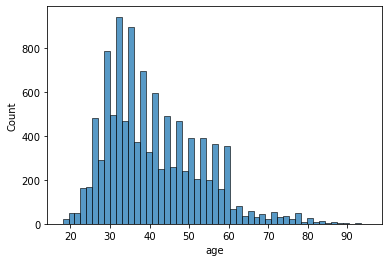

NameError: name 'df' is not defined

In [29]:
univariate_num(data=bank , x="age")

In [ ]:
univariate_num(data=bank , x="balance")

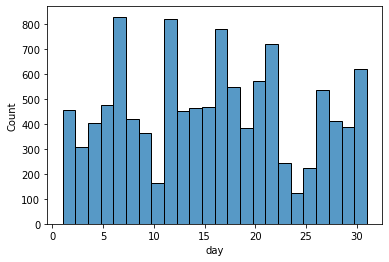

NameError: name 'df' is not defined

In [30]:
univariate_num(data=bank , x="day")

In [ ]:
bank.drop(columns=['day'], inplace=True)

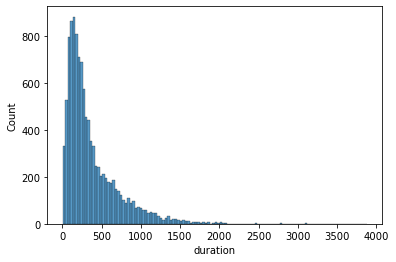

NameError: name 'df' is not defined

In [31]:
univariate_num(data=bank , x="duration")

In [ ]:
univariate_num(data=bank , x="campaign")

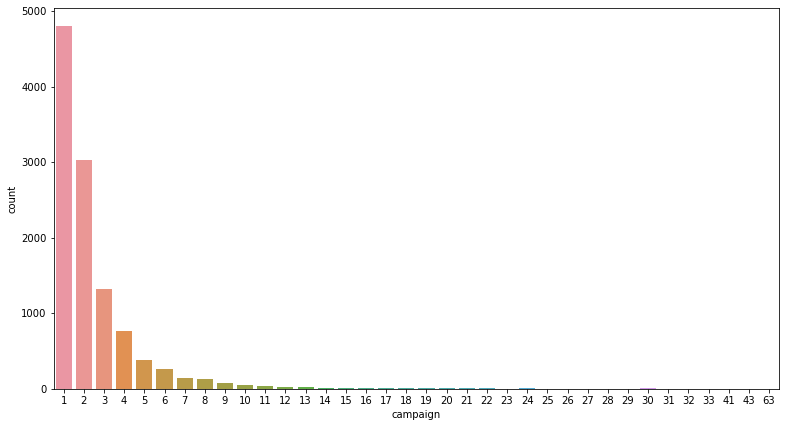

In [32]:
plt.figure(figsize=(13,7))
sns.countplot(data=bank, x='campaign')
plt.show()

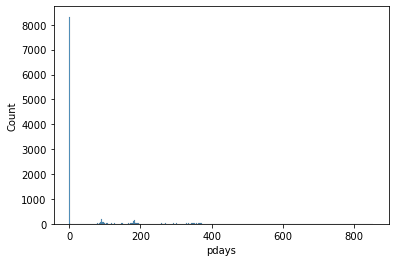

NameError: name 'df' is not defined

In [33]:
univariate_num(data=bank , x="pdays")

In [ ]:
sns.countplot(data=bank, x="pdays")

In [ ]:
bank.loc[bank["pdays"]==-1, "pdays"]=999

bank["recent_days"]=1/bank["pdays"]

bank.drop(columns=["pdays"], inplace=True)

In [ ]:
bank["recent_days"]

In [ ]:
univariate_num(data=bank , x="previous")

## Bivariate Analysis

* cat-cat
* cat-num
* num-num

In [34]:
pd.crosstab(bank["job"], bank["deposit"], normalize="index")         #index = row wise

deposit,0,1
job,,
Others,0.347604,0.652396
White-coller,0.504615,0.495385
blue-collar,0.635802,0.364198
pink-coller,0.600668,0.399332
self-depend,0.577080,0.422920
technician,0.539221,0.460779


In [35]:
pd.crosstab(bank["marital"], bank["deposit"], normalize="index")   

deposit,0,1
marital,,
divorced,0.518948,0.481052
married,0.566210,0.433790
single,0.456509,0.543491


In [36]:
pd.crosstab(bank["education"], bank["deposit"], normalize="index")   

deposit,0,1
education,,
primary,0.606000,0.394000
secondary,0.552593,0.447407
tertiary,0.458932,0.541068
unknown,0.492958,0.507042


In [37]:
pd.crosstab(bank["default"], bank["deposit"], normalize="index")   

deposit,0,1
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


In [38]:
pd.crosstab(bank["housing"], bank["deposit"], normalize="index")   

deposit,0,1
housing,,
no,0.429689,0.570311
yes,0.633592,0.366408


In [39]:
pd.crosstab(bank["loan"], bank["deposit"], normalize="index")   

deposit,0,1
loan,,
no,0.504741,0.495259
yes,0.668493,0.331507


In [43]:
pd.crosstab(bank["month"], bank["deposit"], normalize="all")   

deposit,0,1
month,,
apr,0.030998,0.051693
aug,0.074449,0.061638
dec,0.000896,0.008959
feb,0.030013,0.039509
jan,0.018097,0.012722
jul,0.079466,0.056173
jun,0.060563,0.048916
mar,0.002509,0.022218
may,0.170131,0.082870


In [44]:
pd.crosstab(bank["poutcome"], bank["deposit"])   

deposit,0,1
poutcome,,
failure,610,618
others,5170,3693
success,93,978


###   2. cat-num

In [55]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [48]:
bank.groupby(["deposit"]).agg({'age': ['min', 'mean', 'median', 'max', 'std', 'count']})

age                                       
        min       mean median max        std count
deposit                                           
0        18  40.837391   39.0  89  10.264815  5873
1        18  41.670070   38.0  95  13.497781  5289

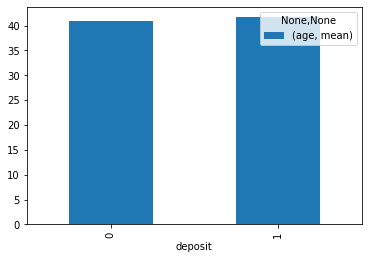

In [50]:
bank.groupby(['deposit']).agg({'age': ['mean']}).plot(kind='bar')
plt.show()

In [51]:
from scipy import stats

In [ ]:
# Null hypo : avg_age_(non deposit) = avg_age_(deposit)
# Alter hypo : avg_age_(non deposit)! = avg_age_(deposit)
    
# test= two sample t test
# CI : 95%
# Alpha : 0.05
# Decision Rule :
#      if p value >= Alpha : Null is accepted
#           p value < alpha : null is rejected and alter is accepted
    
    

In [53]:
dp=bank[bank["deposit"]==1]
ndp=bank[bank["deposit"]==0]

In [54]:
stats.ttest_ind(dp['age'], ndp['age'])

Ttest_indResult(statistic=3.6892130272779955, pvalue=0.00022601800590796526)

In [57]:
bank.groupby(["deposit"]).agg({'balance': ['min', 'mean', 'median', 'max', 'std', 'count']})

balance                                              
            min         mean median    max          std count
deposit                                                      
0         -6847  1280.227141  414.0  66653  2933.411934  5873
1         -3058  1804.267915  733.0  81204  3501.104777  5289

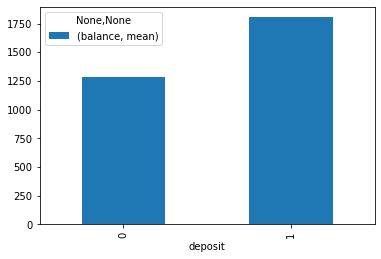

In [56]:
bank.groupby(['deposit']).agg({'balance': ['mean']}).plot(kind='bar')
plt.show()

In [ ]:
# Null hypo : avg_age_(non deposit) = avg_age_(deposit)
# Alter hypo : avg_age_(non deposit)! = avg_age_(deposit)
    
# test= two sample t test
# CI : 95%
# Alpha : 0.05
# Decision Rule :
#      if p value >= Alpha : Null is accepted
#           p value < alpha : null is rejected and alter is accepted
    
    

In [59]:
stats.ttest_ind(dp['balance'], ndp['balance'])

Ttest_indResult(statistic=8.598842126021864, pvalue=9.126568254859532e-18)

In [60]:
bank.groupby(["deposit"]).agg({'duration': ['min', 'mean', 'median', 'max', 'std', 'count']})

duration                                           
             min        mean median   max         std count
deposit                                                    
0              2  223.130257  163.0  3284  208.577530  5873
1              8  537.294574  426.0  3881  392.525262  5289

In [61]:
stats.ttest_ind(dp['duration'], ndp['duration'])

Ttest_indResult(statistic=53.51796190607506, pvalue=0.0)

In [ ]:
var        : t test 

### Num-Num

<AxesSubplot:xlabel='age', ylabel='balance'>

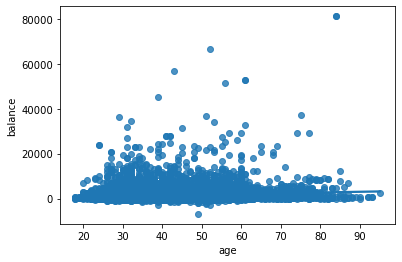

In [62]:
sns.regplot(data=bank, x='age', y='balance')

In [63]:
bank[['age', 'balance']].corr()

,age,balance
age,1.0000,0.1123
balance,0.1123,1.0000


<AxesSubplot:xlabel='age', ylabel='duration'>

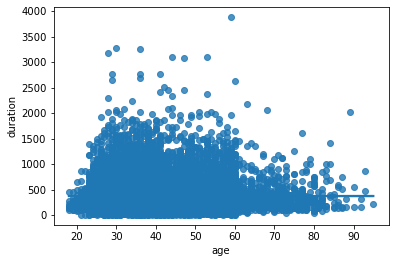

In [64]:
sns.regplot(data=bank, x='age', y='duration')

<AxesSubplot:xlabel='balance', ylabel='duration'>

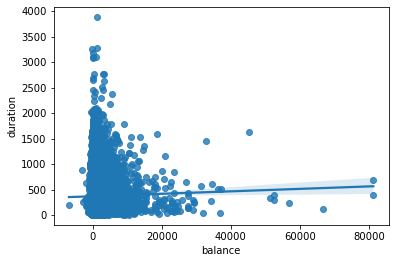

In [68]:
sns.regplot(data=bank, x='balance', y='duration')

## Missing Value treatment `

In [69]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

*** 
* There is no missing Value
***

### Outlier treatment 

<AxesSubplot:ylabel='age'>

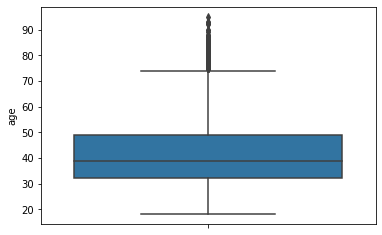

In [71]:
sns.boxplot(data=bank, y='age')

In [72]:
q1=bank['age'].quantile(.25)
q3=bank['age'].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank['age']=np.where(bank['age']>=upper_cap, upper_cap, bank['age'])
bank['age']=np.where(bank['age']<=lower_cap, lower_cap, bank['age'])

<AxesSubplot:ylabel='age'>

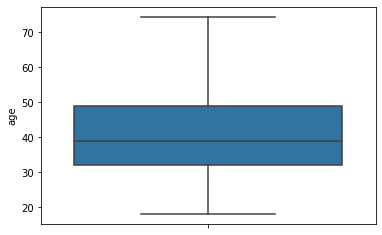

In [73]:
sns.boxplot(data=bank, y='age')

<AxesSubplot:ylabel='balance'>

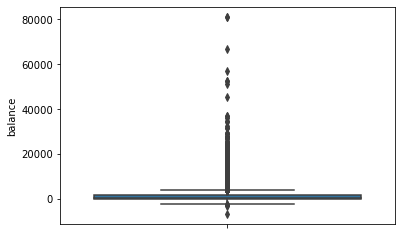

In [81]:
sns.boxplot(data=bank, y='balance')

In [118]:
bank['balance']=np.where(bank['balance']<=0, 0, bank['balance'])       # for remove negative values in balance

In [119]:
var="balance"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap, upper_cap, bank[var])
bank[var]=np.where(bank[var]<=lower_cap, lower_cap, bank[var])

<AxesSubplot:ylabel='balance'>

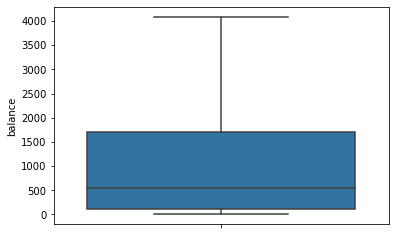

In [84]:
sns.boxplot(data=bank, y='balance')

<AxesSubplot:ylabel='duration'>

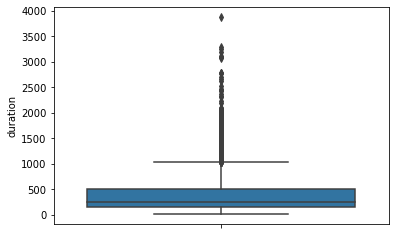

In [85]:
sns.boxplot(data=bank, y='duration')

In [86]:
var="duration"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap, upper_cap, bank[var])
bank[var]=np.where(bank[var]<=lower_cap, lower_cap, bank[var])

<AxesSubplot:ylabel='duration'>

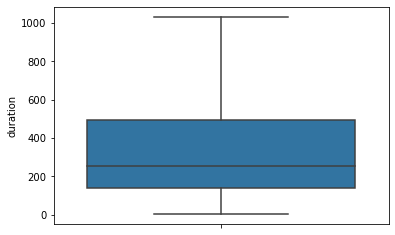

In [87]:
sns.boxplot(data=bank, y='duration')

In [120]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### Non num. to numerical trans 

### dummies

In [121]:
bank1=pd.get_dummies(data=bank, drop_first=True)       #(Auto find cat. variable and change into num.)

In [122]:
bank1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')

### Model development                      10 oct ML


In [112]:
x=bank1.drop(columns=["deposit_yes"])


In [113]:
y=bank1["deposit_yes"]

In [114]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dt=DecisionTreeClassifier()
dt.fit(x_train , y_train)

print("Train Accuracy : ", dt.score(x_train, y_train))
print("Test Accuracy : ", dt.score(x_test, y_test))


Train Accuracy :  1.0
Test Accuracy :  0.7900865930128397


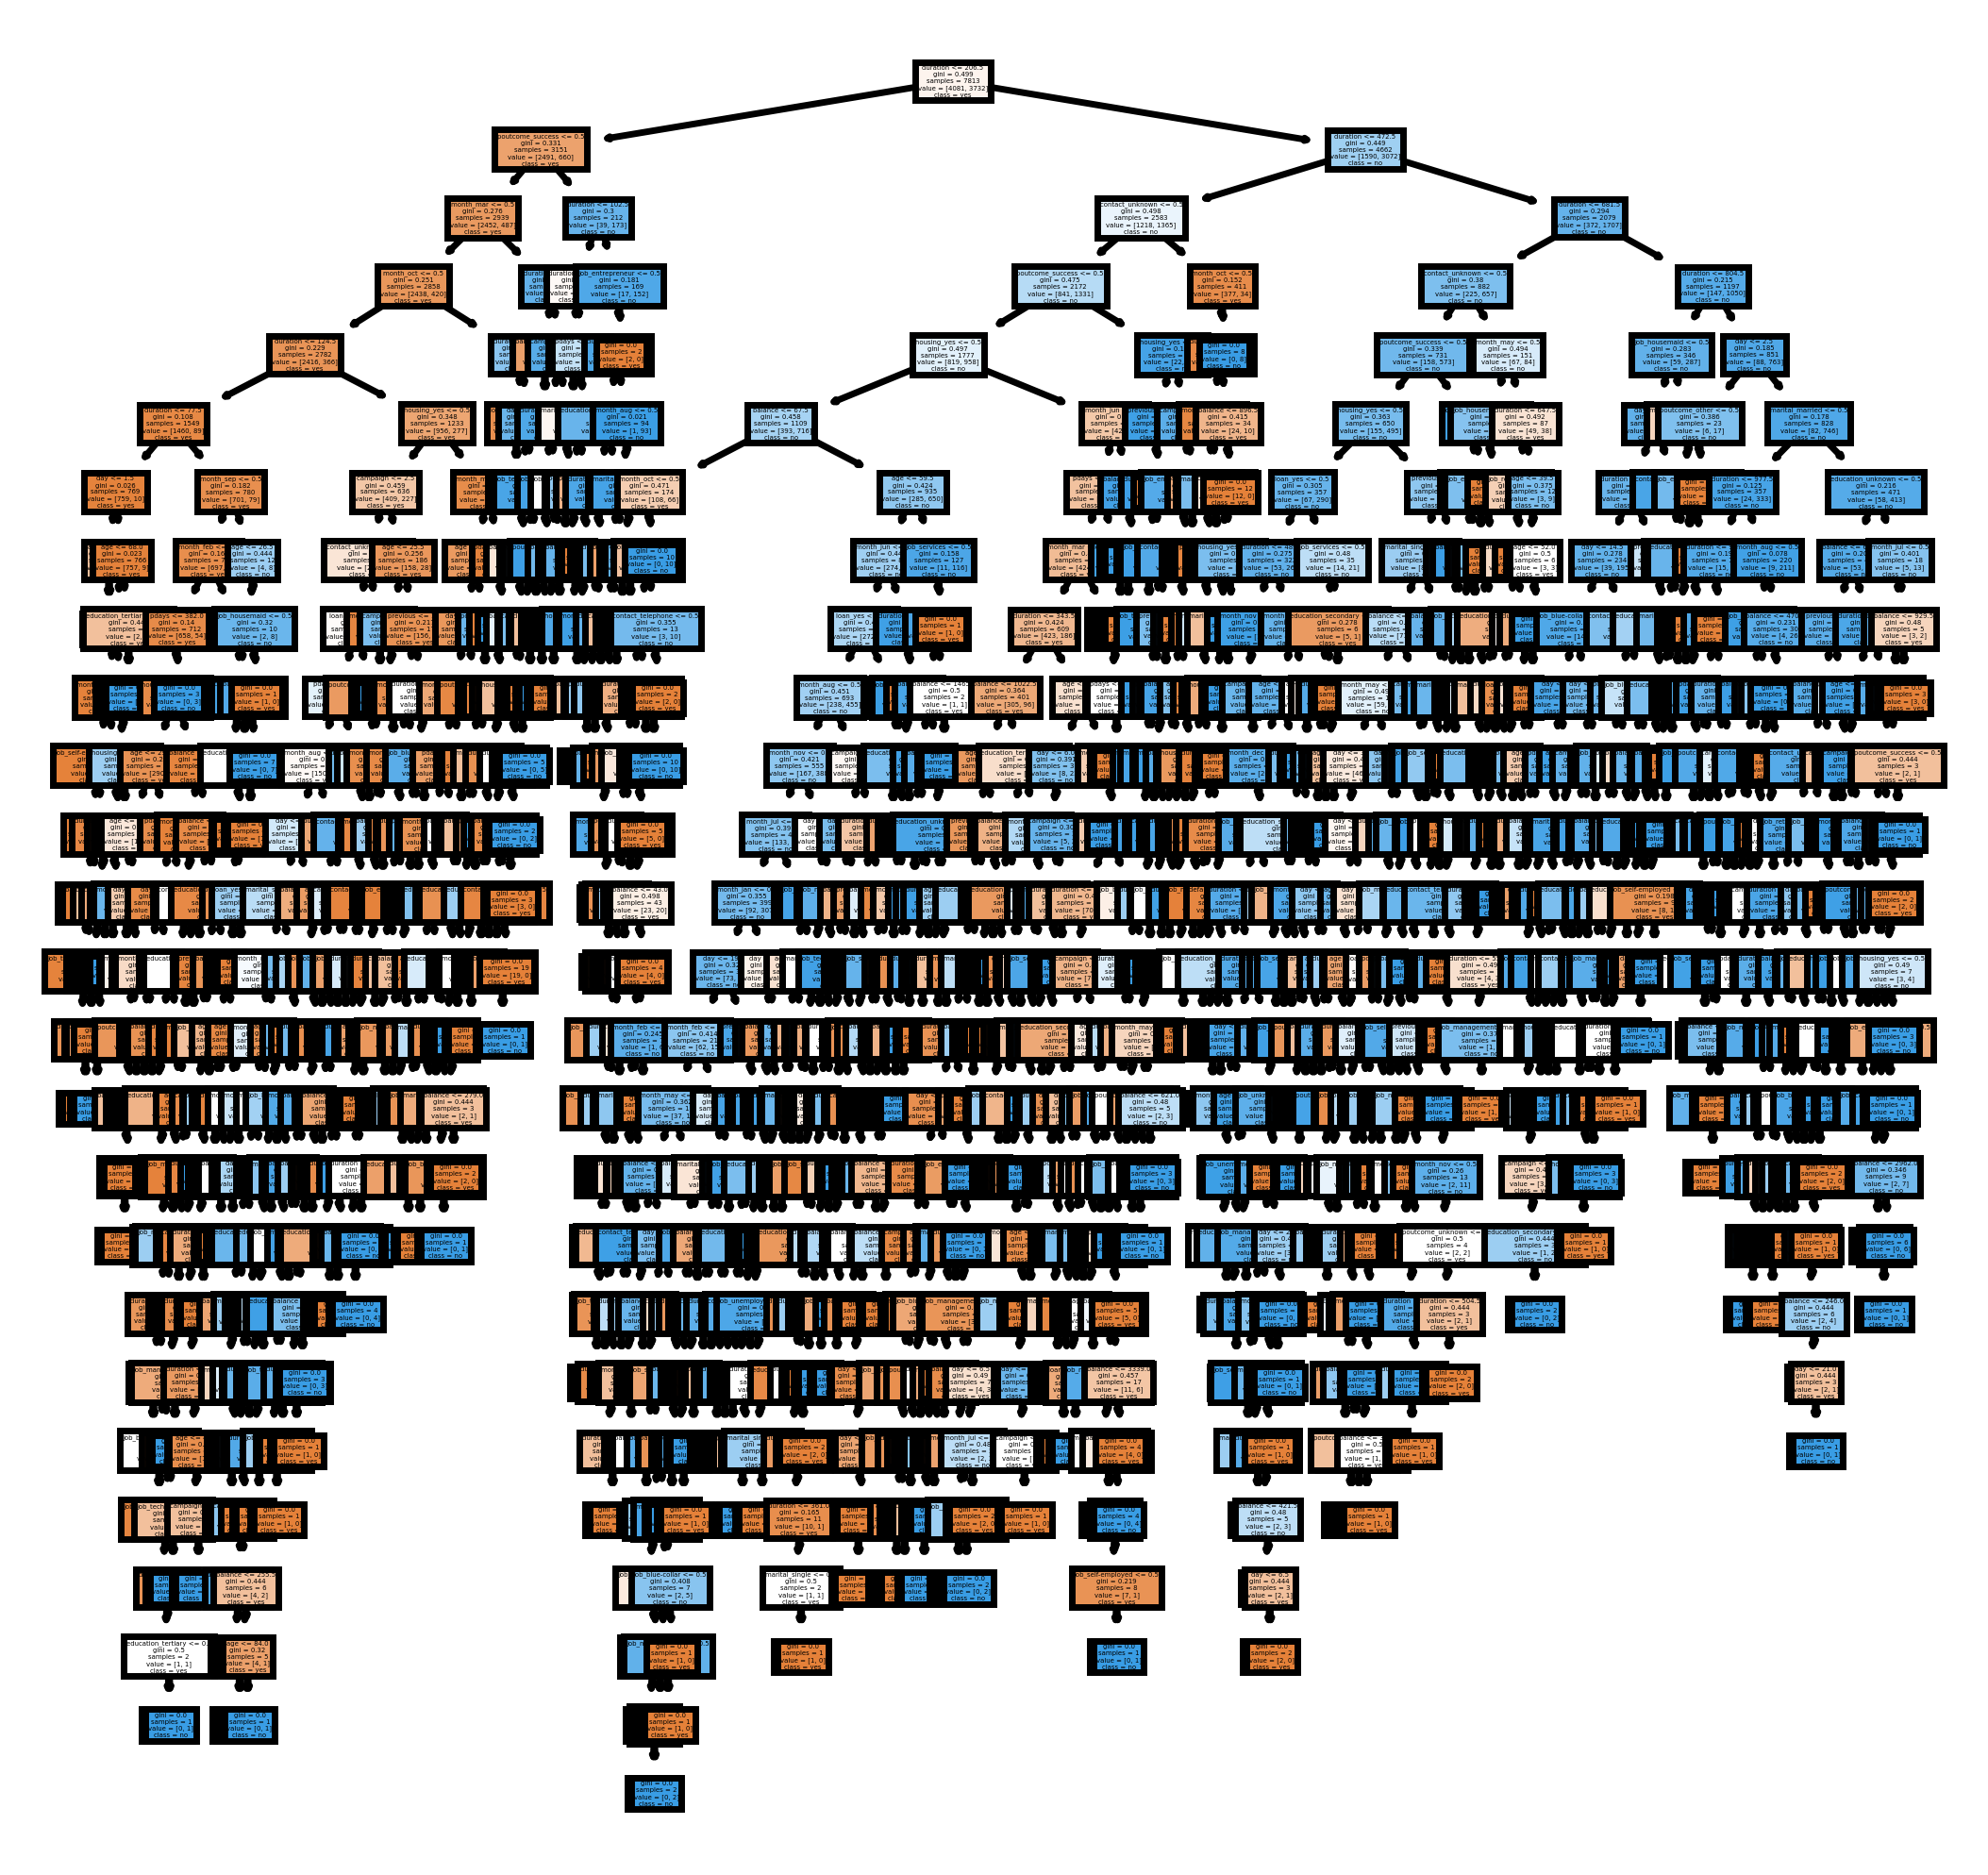

In [125]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=["yes", "no"]

# setting dpi = 300 to make clearer than default 
fig, axes = plt.subplots(nrows = 1, ncols = 1 , figsize =(5,5), dpi=500)

dt_plot=plot_tree(dt, 
                 feature_names = fn, 
                 class_names= cn,
                 filled = True);

***
* Our model is overfitting  as train results are far better that test
* To avoid overfitting : make model simple (control the parameters)
* Cross validation (for avoid over fitting)
***

In [131]:
dt1=DecisionTreeClassifier(max_depth=6)
dt1.fit(x_train , y_train)

print("Train Accuracy : ", round(dt1.score(x_train, y_train), 3))
print("Test Accuracy : ", round(dt1.score(x_test, y_test), 3))


Train Accuracy :  0.824
Test Accuracy :  0.812


In [145]:
dt1=DecisionTreeClassifier(min_samples_split=200)
dt1.fit(x_train , y_train)

print("Train Accuracy : " +str(round(dt1.score(x_train, y_train), 2)*100)+str('%'))
print("Test Accuracy : " +str(round(dt1.score(x_test, y_test), 2)*100)+str('%'))


Train Accuracy : 84.0%
Test Accuracy : 82.0%


In [149]:
dt1=DecisionTreeClassifier(min_samples_leaf=54)
dt1.fit(x_train , y_train)

print("Train Accuracy : " +str(round(dt1.score(x_train, y_train), 2)*100)+str('%'))
print("Test Accuracy : " +str(round(dt1.score(x_test, y_test), 2)*100)+str('%'))


Train Accuracy : 84.0%
Test Accuracy : 82.0%


In [ ]:
dt1=DecisionTreeClassifier(criterion=54)
dt1.fit(x_train , y_train)

print("Train Accuracy : " +str(round(dt1.score(x_train, y_train), 2)*100)+str('%'))
print("Test Accuracy : " +str(round(dt1.score(x_test, y_test), 2)*100)+str('%'))


## Grid Search : parameter tuning 

In [ ]:
criterion=["gini", "entropy"]
max_depth=[5,7,9,11, 14]
min_sample_split=[10, 15, 20, 50, 100, 200, 250]
min_sample_leaf=[5,10,15,20,50,80,100]


In [ ]:
iter   criterian     depth    split     leaf   Accuracy             #backend Work   
0        gini          5        10       5       65%
1        gini          5        20       10      64%
2        gini          5         10      15      67%
3        gini          5         10      20      58%
4        gini          5         10      50      59%
5        gini          5         10      80      68%
6        gini          5         10      100      69%

In [154]:
from sklearn.model_selection import GridSearchCV

params={
    "criterion": ["gini", "entropy"],
'max_depth': [5,7,9,11,14],
'min_samples_split' : [10, 15, 20, 50, 100, 200, 250],
'min_samples_leaf': [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train, y_train)

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 14],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [ ]:
# CV : Cross Validation = 10    (if cv 5 then break 5 parts)
10000 : 1000*10 (divide into 10 parts)                            # for avoid overfitting

In [155]:
gd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 15,
 'min_samples_split': 100}

In [157]:
gd_search.best_score_

0.8371954114830812

In [159]:
gd_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=15,
                       min_samples_split=100)

In [162]:
pd.DataFrame(gd_search.cv_results_)         # Our detailed result just for saw result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051524,0.006837,0.008007,0.007428,gini,5,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.812020,...,0.807939,0.791293,0.800256,0.837388,0.811780,0.806658,0.797695,0.807117,0.011880,327
1,0.050102,0.011530,0.006592,0.006924,gini,5,5,15,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.812020,...,0.807939,0.790013,0.798976,0.834827,0.811780,0.807939,0.797695,0.806733,0.011504,332
2,0.055416,0.011600,0.000000,0.000000,gini,5,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.812020,...,0.806658,0.790013,0.798976,0.834827,0.811780,0.807939,0.797695,0.806605,0.011497,340
3,0.049063,0.008475,0.001563,0.004689,gini,5,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.812020,...,0.806658,0.790013,0.798976,0.833547,0.810499,0.807939,0.795134,0.805965,0.011351,382
4,0.042363,0.014123,0.006538,0.008046,gini,5,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.812020,...,0.807939,0.791293,0.800256,0.834827,0.811780,0.805378,0.795134,0.806349,0.011561,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.052383,0.009728,0.003176,0.006353,entropy,14,100,20,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.809463,...,0.816901,0.813060,0.809219,0.828425,0.814341,0.811780,0.793854,0.809807,0.009272,290
486,0.063406,0.015459,0.006953,0.007428,entropy,14,100,50,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.809463,...,0.816901,0.813060,0.809219,0.828425,0.814341,0.811780,0.793854,0.810062,0.009045,287
487,0.051396,0.007626,0.001562,0.004687,entropy,14,100,100,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.809463,...,0.816901,0.813060,0.809219,0.828425,0.814341,0.811780,0.793854,0.810062,0.009045,287
488,0.052948,0.010801,0.002865,0.005760,entropy,14,100,200,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.809463,...,0.816901,0.813060,0.809219,0.828425,0.814341,0.811780,0.793854,0.809807,0.009272,290


In [163]:
dt_f=DecisionTreeClassifier(criterion='entropy', max_depth=14,
                            min_samples_leaf=15,
                            min_samples_split=100)
dt_f.fit(x_train, y_train)
print("Train Accuracy : " +str(round(dt1.score(x_train, y_train), 2)*100)+str('%'))
print("Test Accuracy : " +str(round(dt1.score(x_test, y_test), 2)*100)+str('%'))

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=15,
                       min_samples_split=100)

Train Accuracy : 84.0%
Test Accuracy : 82.0%


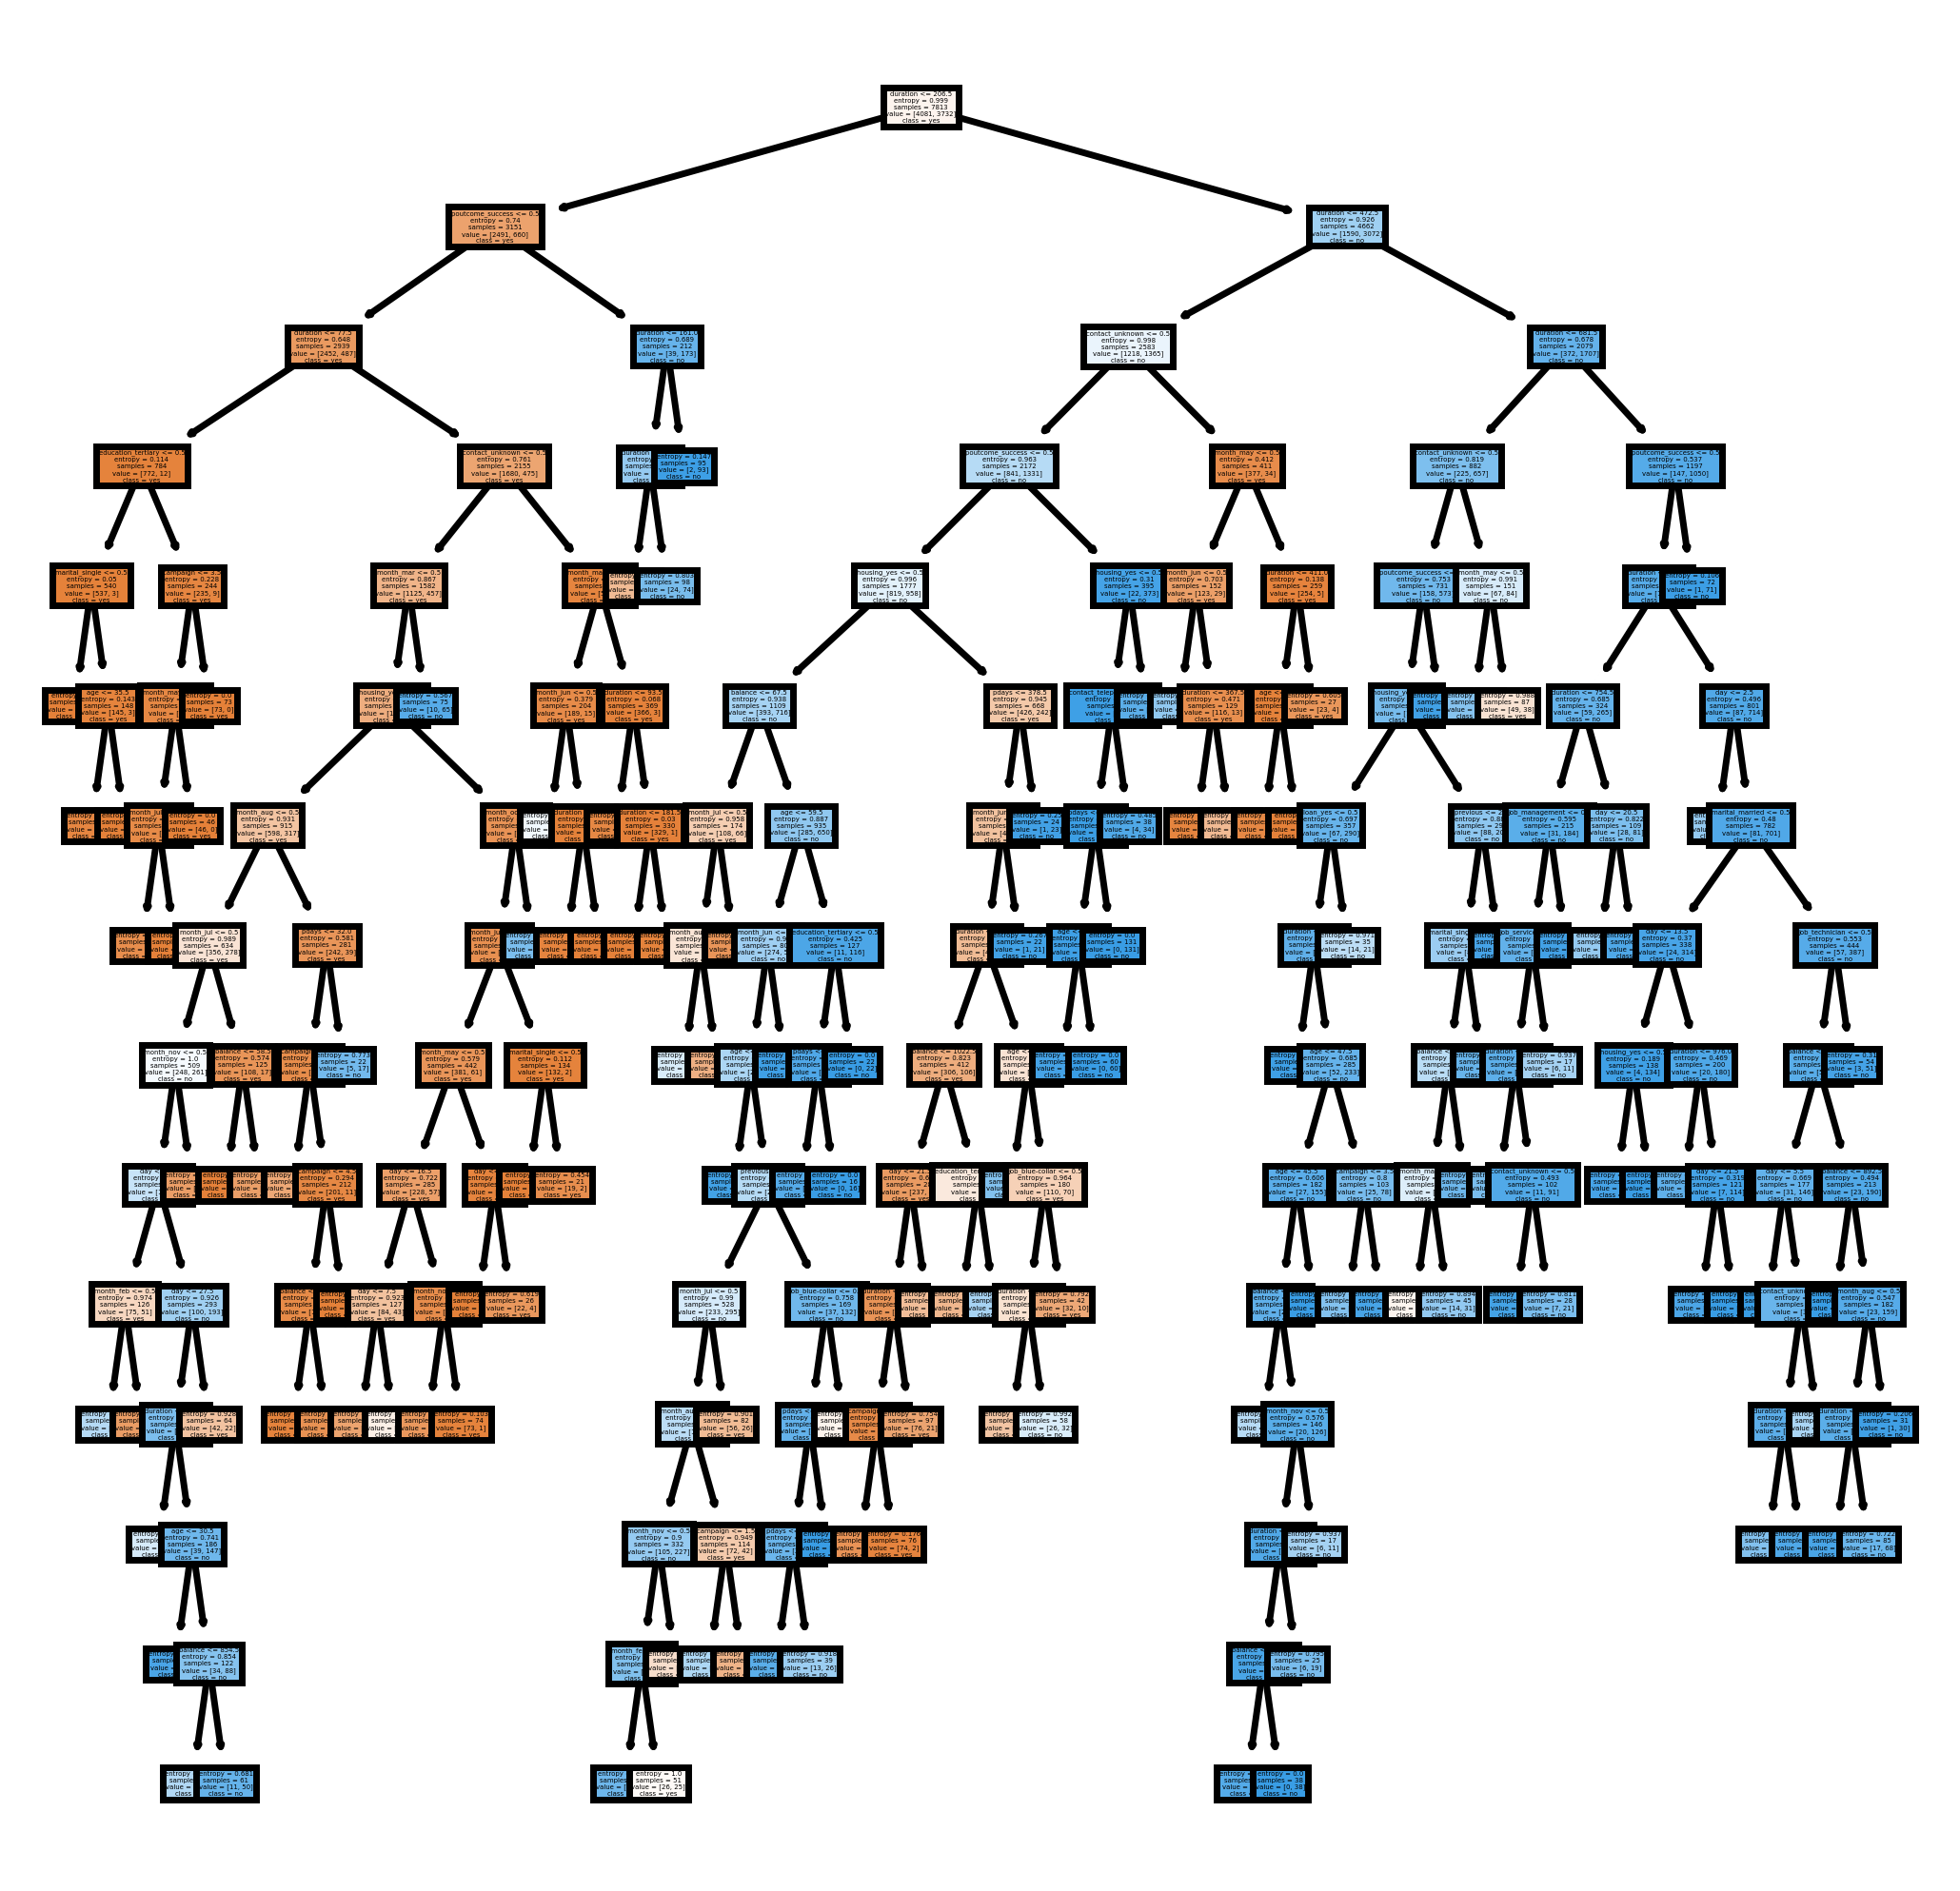

In [165]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=["yes", "no"]

# setting dpi = 300 to make clearer than default 
fig, axes = plt.subplots(nrows = 1, ncols = 1 , figsize =(5,5), dpi=500)

dt_plot=plot_tree(dt_f, 
                 feature_names = fn, 
                 class_names= cn,
                 filled = True);

In [168]:
from sklearn.tree import export_text
rules=tree.export_text(dt_f, feature_names=x_train.columns.to_list())      # just for see the rules (not need)
print(rules)

NameError: name 'tree' is not defined

## Feature importance

In [176]:
feat_imp=pd.DataFrame({"Variable" :x_train.columns, 
             "Imp":dt_f.feature_importances_}).sort_values(by="Imp", ascending=False)

<AxesSubplot:xlabel='Variable', ylabel='Imp'>

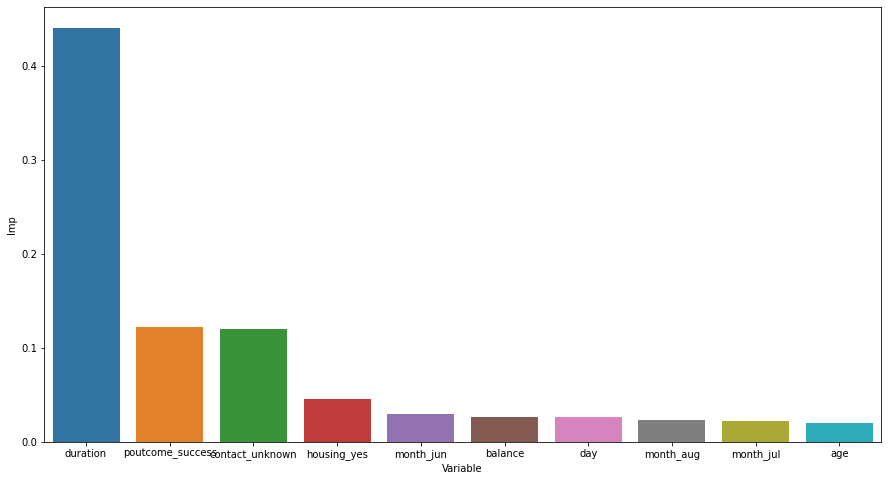

In [186]:
plt.figure(figsize=(15,8))
sns.barplot(data=feat_imp.head(10), x="Variable", y="Imp")

In [188]:
feat_imp[feat_imp["Imp"]>=0.01]      # select only variable where imp greater than 1%

,Variable,Imp
3,duration,0.440941
40,poutcome_success,0.122260
27,contact_unknown,0.120299
24,housing_yes,0.046185
33,month_jun,0.030167
1,balance,0.026803
2,day,0.026519
28,month_aug,0.023323
32,month_jul,0.021963
0,age,0.020156


In [189]:
feat_imp[feat_imp["Imp"]>=0.01]["Variable"].unique() 

array(['duration', 'poutcome_success', 'contact_unknown', 'housing_yes',
       'month_jun', 'balance', 'day', 'month_aug', 'month_jul', 'age',
       'pdays', 'month_mar', 'month_may', 'month_nov'], dtype=object)

In [198]:
x_train1=x_train[['duration', 'poutcome_success', 'contact_unknown', 'housing_yes',
       'month_jun', 'balance', 'day', 'month_aug', 'month_jul', 'age',
       'pdays', 'month_mar', 'month_may', 'month_nov']]

x_test1=x_test[['duration', 'poutcome_success', 'contact_unknown', 'housing_yes
       'month_jun', 'balance', 'day', 'month_aug', 'month_jul', 'age',
       'pdays', 'month_mar', 'month_may', 'month_nov']]

In [204]:
dt_f=DecisionTreeClassifier(criterion='entropy', max_depth=14,
                            min_samples_leaf=15,
                            min_samples_split=100)
dt_f.fit(x_train1, y_train)

print("Train Accuracy : ", round(dt_f.score(x_train1, y_train), 2))
print("Test Accuracy : ", round(dt_f.score(x_test1, y_test), 2))

Train Accuracy :  0.85
Test Accuracy :  0.83


In [207]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)

In [211]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [213]:
metrics.accuracy_score(y_train, pred_train)
metrics.accuracy_score(y_test, pred_test)

0.8312929232606748

In [214]:
metrics.recall_score(y_train, pred_train)
metrics.recall_score(y_test, pred_test)

0.8310854206807964

In [216]:
metrics.precision_score(y_train, pred_train)
metrics.precision_score(y_test, pred_test)

0.8107769423558897

In [217]:
metrics.f1_score(y_train, pred_train)
metrics.f1_score(y_test, pred_test)

0.8208055819854106

In [227]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    roc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy" : ac1, "Recall" : rc1, "Precision": pc1, "F1_score" : f1 , "Auc": roc1}
    
    fpr, tpr, threshold=metrics.roc_curve(act, probs)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    return result


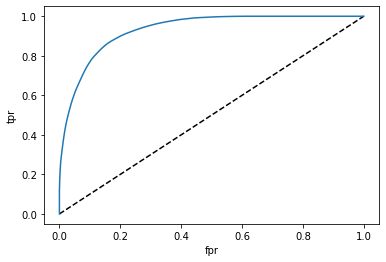

{'Accuracy': 0.8515295021118648,
 'Recall': 0.8590568060021436,
 'Precision': 0.8348958333333333,
 'F1_score': 0.8468040147913365,
 'Auc': 0.8518513630598809}

In [228]:
classification_eva(y_train, pred_train, probs=prob_train_1)

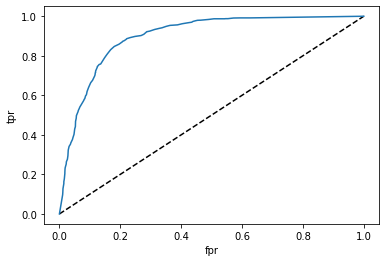

{'Accuracy': 0.8312929232606748,
 'Recall': 0.8310854206807964,
 'Precision': 0.8107769423558897,
 'F1_score': 0.8208055819854106,
 'Auc': 0.8312793174832553}

In [229]:
classification_eva(y_test, pred_test, probs=prob_test_1)